In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset

dframe = pd.read_csv('SAheart.csv')

display(dframe.head())

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Plot linear correlations between the variables of interest from the dataset

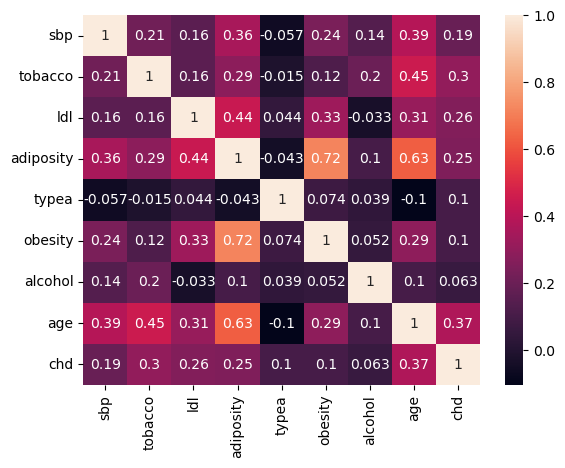

In [3]:
coor_matrix = dframe[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea',
'obesity', 'alcohol', 'age', 'chd']].corr()

sn.heatmap(coor_matrix, annot=True)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Random split dataset for training sets and test sets (e.g., 85 + 15: 85% for training, 15% for testing)

In [5]:
feature_data = dframe[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea',
'obesity', 'alcohol', 'age']].values

In [6]:
labels = dframe['chd'].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_data,
labels, test_size=0.20, random_state=2021)

Train a logistic regression model with the training data and training labels

In [8]:
trained_lr_model = LogisticRegression().fit(X_train, Y_train, )

Evaluate the trained classifier’s performance with the seen training data

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score

3

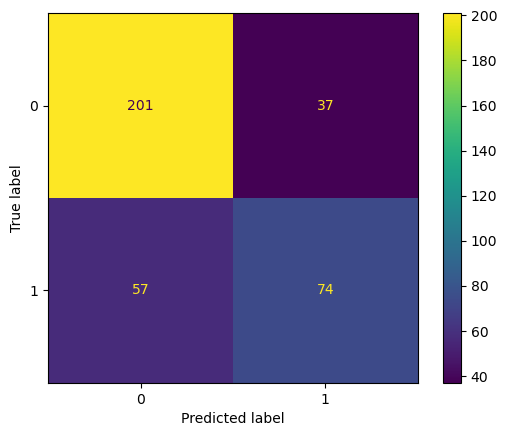

In [10]:
# predictions of label classes for the seen train data
predicted_Y_train = trained_lr_model.predict(X_train)

label_class_set = trained_lr_model.classes_

# calculate and plot confusion matrix
cm = metrics.confusion_matrix(Y_train, predicted_Y_train,
labels=label_class_set)

disp = ConfusionMatrixDisplay(cm, display_labels=label_class_set)
disp.plot()
plt.show

# calculate accuracy score
accuracy = metrics.accuracy_score(Y_train, predicted_Y_train)
3


0.7452574525745257
0.6666666666666666
0.5648854961832062


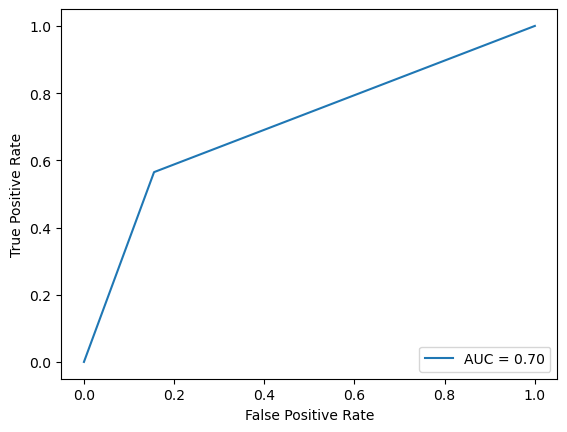

In [11]:
# calculate accuracy score
accuracy = metrics.accuracy_score(Y_train, predicted_Y_train)

print(accuracy)

# calculate precision score
precision = precision_score(Y_train, predicted_Y_train)
print(precision)

# calculate recall score
recall = recall_score(Y_train, predicted_Y_train)
print(recall)

# calculate and plot ROC AUC curve
FPR, TPR, _ = metrics.roc_curve(Y_train, predicted_Y_train)
roc_auc = metrics.auc(FPR, TPR)
disp = metrics.RocCurveDisplay(fpr=FPR, tpr=TPR, roc_auc=roc_auc)
disp.plot()
plt.show()

Evaluate the trained classifier’s performance with the unseen test data

In [12]:
# predictions of label class for unseen test data
predicted_Y_test = trained_lr_model.predict(X_test)

# calculate and plot confusion matrix
cm_test = metrics.confusion_matrix(Y_test, predicted_Y_test,
labels=label_class_set)
disp = ConfusionMatrixDisplay(cm_test,
display_labels=label_class_set)
4


4

0.6559139784946236
0.45161290322580644
0.4827586206896552


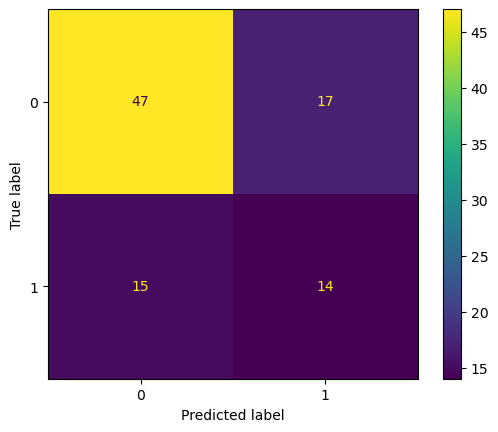

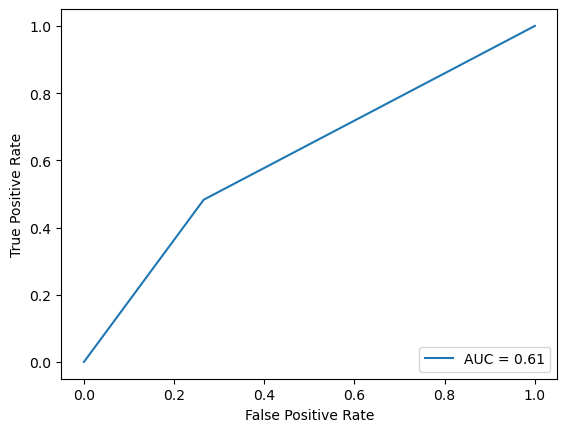

In [13]:
disp.plot()
plt.show

# calculate accuracy score
accuracy_test = metrics.accuracy_score(Y_test, predicted_Y_test)
print(accuracy_test)

# calculate precision score
precision_test = precision_score(Y_test, predicted_Y_test)
print(precision_test)

# calculate recall score
recall_test = recall_score(Y_test, predicted_Y_test)
print(recall_test)

# calculate and plot ROC AUC curve
FPR_test, TPR_test, _ = metrics.roc_curve(Y_test,
predicted_Y_test)
roc_auc_test = metrics.auc(FPR_test, TPR_test)
disp = metrics.RocCurveDisplay(fpr=FPR_test, tpr=TPR_test,
roc_auc=roc_auc_test)
disp.plot()
plt.show()